In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime
import types
from botocore.client import Config
import ibm_boto3

In [13]:
# The code was removed by Watson Studio for sharing.

,Company,Date,Closing (c),High (c),Low (c),Volume,# Deals,Value (R),Move (%),DY,EY,PE
0,MTN,2020-02-17,8820,8879,8725,2350702,3130,207 277 923,0.0112,0.0000,0.0000,0.0000
1,MTN,2020-02-14,8722,8873,8696,3895872,5710,340 272 727,-0.0072,4.7695,3.6344,27.5141
2,MTN,2020-02-13,8785,8978,8712,4837848,8169,425 234 479,-0.0028,4.7353,3.6084,27.7129
3,MTN,2020-02-12,8810,8961,8330,7969935,14546,701 183 321,0.06,4.7219,3.5981,27.7917
4,MTN,2020-02-11,8311,8385,8225,3576616,5561,297 254 218,0.0034,5.0054,3.8142,26.2176


In [14]:
s = []
for n in df['Value (R)'][:]:
    s.append(str(n))
a = []
for n in s:
    a.append(float(''.join(n.split())))
df['Value'] = a
df.drop(["Value (R)"], axis=1, inplace=True)
df.dtypes

Company                object
Date           datetime64[ns]
Closing (c)             int64
High (c)                int64
Low (c)                 int64
Volume                  int64
# Deals                 int64
Move (%)               object
DY                    float64
EY                    float64
PE                    float64
Value                 float64
dtype: object

In [15]:
df.rename(columns={"Move (%)":"Move_Perc"}, inplace=True)
df.head()

,Company,Date,Closing (c),High (c),Low (c),Volume,# Deals,Move_Perc,DY,EY,PE,Value
0,MTN,2020-02-17,8820,8879,8725,2350702,3130,0.0112,0.0000,0.0000,0.0000,207277923.0
1,MTN,2020-02-14,8722,8873,8696,3895872,5710,-0.0072,4.7695,3.6344,27.5141,340272727.0
2,MTN,2020-02-13,8785,8978,8712,4837848,8169,-0.0028,4.7353,3.6084,27.7129,425234479.0
3,MTN,2020-02-12,8810,8961,8330,7969935,14546,0.06,4.7219,3.5981,27.7917,701183321.0
4,MTN,2020-02-11,8311,8385,8225,3576616,5561,0.0034,5.0054,3.8142,26.2176,297254218.0


In [16]:
df["Move_Perc"] = np.where((df.Move_Perc == '...'),0,df.Move_Perc)
s = []
for n in df["Move_Perc"][:]:
    s.append(str(n))
a = []
for n in s:
    a.append(float(''.join(n.split())))
df['Move_Percentage'] = a
df.drop(["Move_Perc"], axis=1, inplace=True)
df.dtypes

Company                    object
Date               datetime64[ns]
Closing (c)                 int64
High (c)                    int64
Low (c)                     int64
Volume                      int64
# Deals                     int64
DY                        float64
EY                        float64
PE                        float64
Value                     float64
Move_Percentage           float64
dtype: object

In [17]:
df1 = df.pivot(index="Date", columns="Company", values="Closing (c)").pct_change().apply(lambda x: np.log(1+x))
df1.sort_index(ascending=False, inplace=True)

In [18]:
df1.reset_index(0)
df1.tail()

Company,BATS,DISCOVERY,FIRSTRAND,HARMONY,MTN,NASPERS,OLD MUTUAL,SAPPI,SASOL,TIGERBRANDS
Date,,,,,,,,,,
1994-01-07,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.00000,0.000000,0.000000
1994-01-06,NaN,NaN,NaN,0.019803,NaN,NaN,NaN,0.01600,0.013245,-0.004727
1994-01-05,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.00000,-0.013245,0.000000
1994-01-04,NaN,NaN,NaN,0.083382,NaN,NaN,NaN,0.03279,0.013245,0.019043
1994-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#df1.drop(['BATS', 'OLD MUTUAL'], axis=1, inplace=True)
#df1.drop(df1.index[5287:6801], inplace=True)

In [19]:
cov = df1.cov()
cov

Company,BATS,DISCOVERY,FIRSTRAND,HARMONY,MTN,NASPERS,OLD MUTUAL,SAPPI,SASOL,TIGERBRANDS
Company,,,,,,,,,,
BATS,0.000186,0.000006,-0.000003,2.025608e-05,0.000013,2.572504e-05,0.000003,0.000046,0.000037,0.000010
DISCOVERY,0.000006,0.000312,0.000123,-9.185865e-06,0.000106,1.057475e-04,0.000153,0.000061,0.000072,0.000076
FIRSTRAND,-0.000003,0.000123,0.000423,-1.707865e-05,0.000199,1.731114e-04,0.000155,0.000127,0.000135,0.000140
HARMONY,0.000020,-0.000009,-0.000017,1.013204e-03,0.000011,-8.622525e-07,-0.000084,0.000085,0.000091,0.000011
MTN,0.000013,0.000106,0.000199,1.110070e-05,0.000665,1.833218e-04,0.000091,0.000105,0.000143,0.000109
NASPERS,0.000026,0.000106,0.000173,-8.622525e-07,0.000183,5.503304e-04,0.000089,0.000128,0.000137,0.000096
OLD MUTUAL,0.000003,0.000153,0.000155,-8.384992e-05,0.000091,8.883546e-05,0.000269,0.000092,0.000122,0.000080
SAPPI,0.000046,0.000061,0.000127,8.541569e-05,0.000105,1.280126e-04,0.000092,0.000635,0.000177,0.000079
SASOL,0.000037,0.000072,0.000135,9.125295e-05,0.000143,1.366968e-04,0.000122,0.000177,0.000486,0.000101


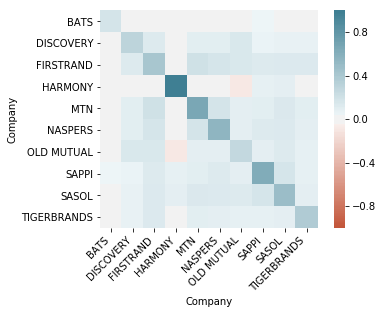

In [23]:
import seaborn as sns

ax = sns.heatmap(
    cov*1000, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
corr = df1.corr()
corr

Company,BATS,DISCOVERY,FIRSTRAND,HARMONY,MTN,NASPERS,OLD MUTUAL,SAPPI,SASOL,TIGERBRANDS
Company,,,,,,,,,,
BATS,1.000000,0.027247,-0.012435,0.046854,0.045221,0.088570,0.009958,0.127919,0.135448,0.033616
DISCOVERY,0.027247,1.000000,0.358909,-0.016179,0.249881,0.254222,0.454960,0.137750,0.193843,0.223602
FIRSTRAND,-0.012435,0.358909,1.000000,-0.025598,0.386327,0.345826,0.513092,0.237757,0.293121,0.342931
HARMONY,0.046854,-0.016179,-0.025598,1.000000,0.013373,-0.001147,-0.164639,0.106483,0.130049,0.017805
MTN,0.045221,0.249881,0.386327,0.013373,1.000000,0.299593,0.231100,0.158493,0.249906,0.217658
NASPERS,0.088570,0.254222,0.345826,-0.001147,0.299593,1.000000,0.198502,0.214969,0.264093,0.213145
OLD MUTUAL,0.009958,0.454960,0.513092,-0.164639,0.231100,0.198502,1.000000,0.218787,0.307399,0.264420
SAPPI,0.127919,0.137750,0.237757,0.106483,0.158493,0.214969,0.218787,1.000000,0.319157,0.163606
SASOL,0.135448,0.193843,0.293121,0.130049,0.249906,0.264093,0.307399,0.319157,1.000000,0.238884


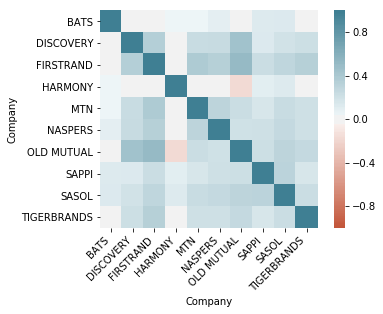

In [22]:
import seaborn as sns

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);